<style type="text/css">
ol {
  counter-reset: item
}
li {
  display: block
}
li:before {
  content: counters(item, ".") " ";
  counter-increment: item
}
</style>
# Maschinelles Lernen - Labor 10 - 25.11.2021
<hr>

#### Prof. Dr. Fabian Transchel - Hochschule Harz
#### Stand: 25.11.2021

<hr>

<div style="border:1px solid black; background-color: #fefeee; padding:15px;">
    <b>Übung:</b><br><br>
    Wir betrachten den Datensatz <b>cruise_ship_info.csv</b>
    <ol>
        <li>Führen Sie eine explorative Datenanalyse durch. Was ist bemerkenswert?</li>
        <li>Es soll der Crewumfang in Abhängigkeit der anderen Merkmale geschätzt werden. Wie könnte man vorgehen?</li>
        <li>Fertigen Sie Scatterplots bezüglich der relevanten Merkmale (vs. Crew) an.</li>
    </ol>
</div>

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [63]:
ship_df = pd.read_csv("cruise_ship_info.csv")
ship_df

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


In [5]:
ship_df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


### Notizen zu technischen Daten von Schiffen:

Unter __Schiffsmaßen__ versteht man unterschiedliche technische Daten wie Masse- und Raumangaben, Verdrängung, Tragfähigkeit, Tiefgang, Länge und Geschwindigkeit eines Schiffes.

Der Begriff __Tonnage__ bezieht sich auf die _Bruttoregistertonne_ und gibt das gesamte Raumvolumen eines Schiffes an. 

$1 Tonnage = 100 Kubikfuss = 2,8316846592 m^3$


In [64]:
print(ship_df[ship_df["Ship_name"] == "Princess"])

Empty DataFrame
Columns: [Ship_name, Cruise_line, Age, Tonnage, passengers, length, cabins, passenger_density, crew]
Index: []


In [11]:
cruise_lines_count = ship_df["Cruise_line"].value_counts()
print(cruise_lines_count)

Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
Star                  6
P&O                   6
Regent_Seven_Seas     5
Silversea             4
Oceania               3
Seabourn              3
Windstar              3
Cunard                3
Disney                2
Crystal               2
Azamara               2
Orient                1
Name: Cruise_line, dtype: int64


### Pairplots

Erster Paiplot mit `Cruise_line` als target

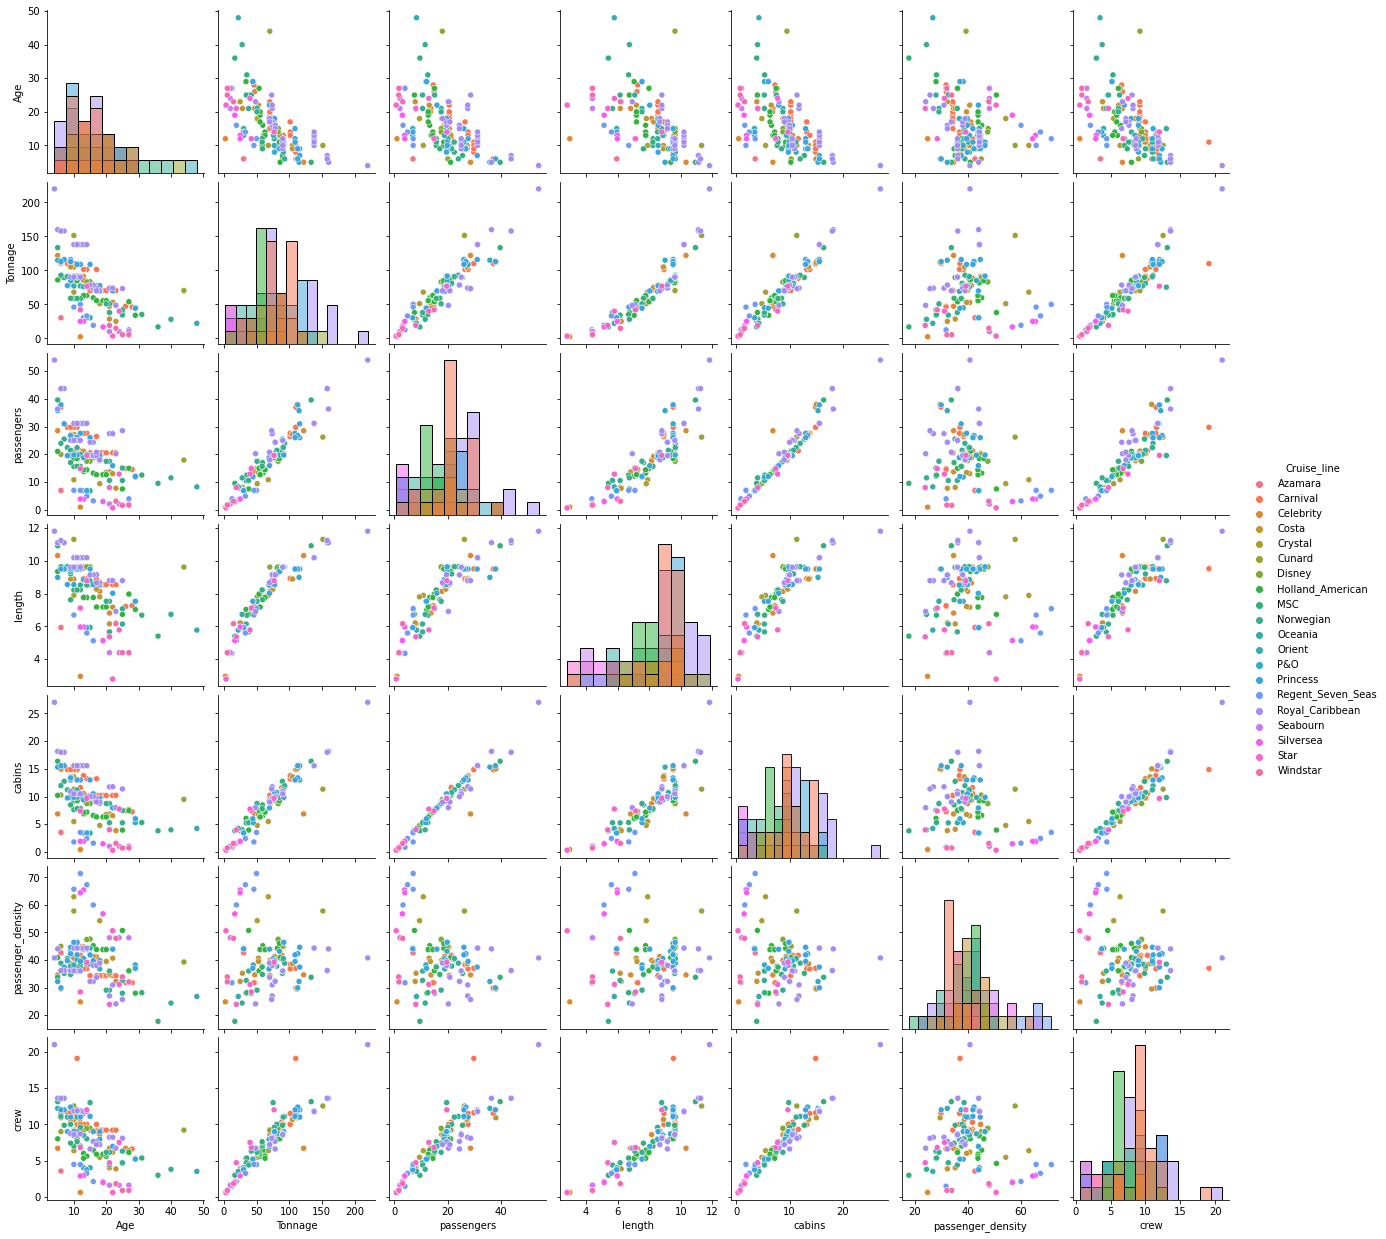

In [37]:
sns.pairplot(ship_df, hue = "Cruise_line", diag_kind = "hist")

<AxesSubplot:>

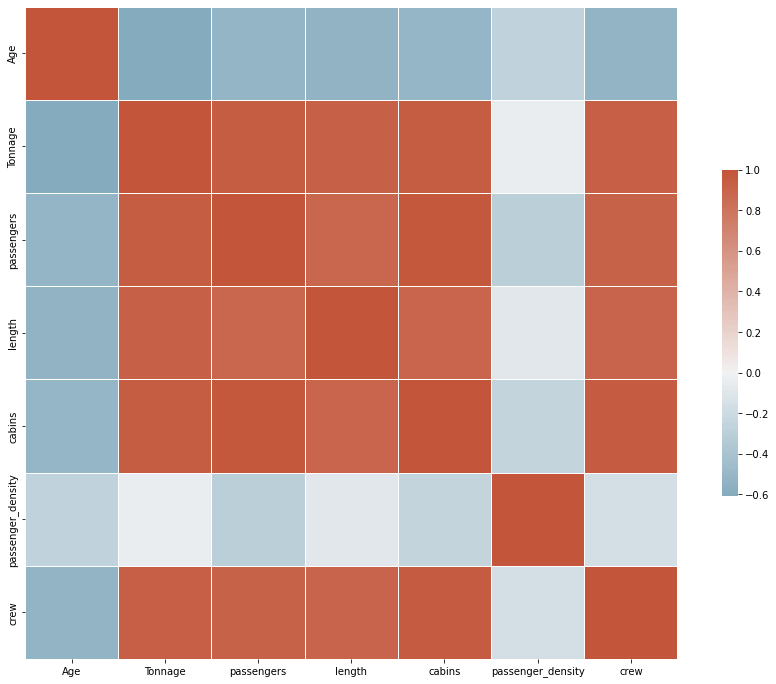

In [46]:
corr = ship_df.corr()
mask =  np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True) # Angepasste Colormap
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Zweiter Paiplot mit `Age` als target

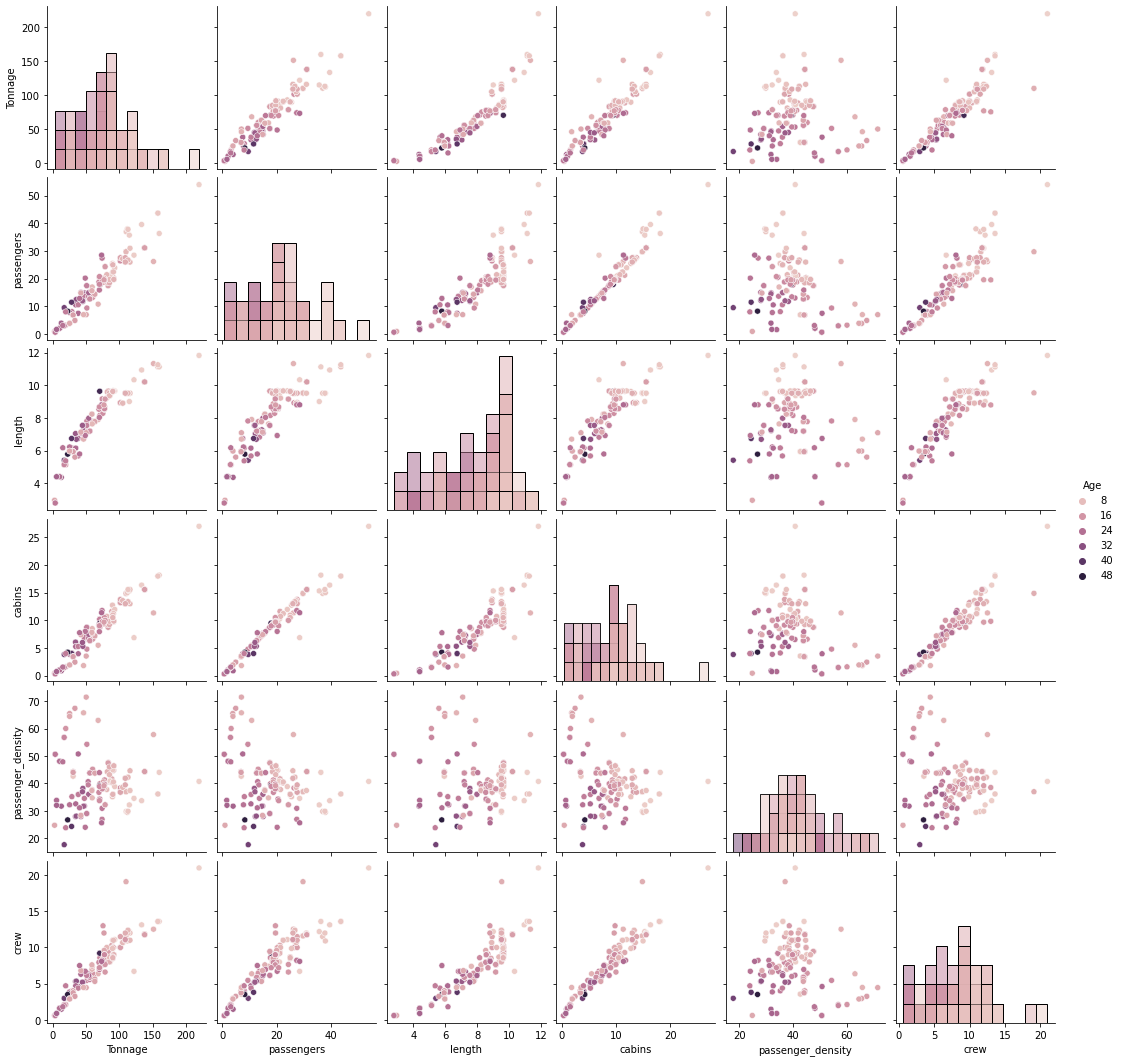

In [47]:
sns.pairplot(ship_df, hue = "Age", diag_kind = "hist")

Dritter Paiplot mit `crew` als target

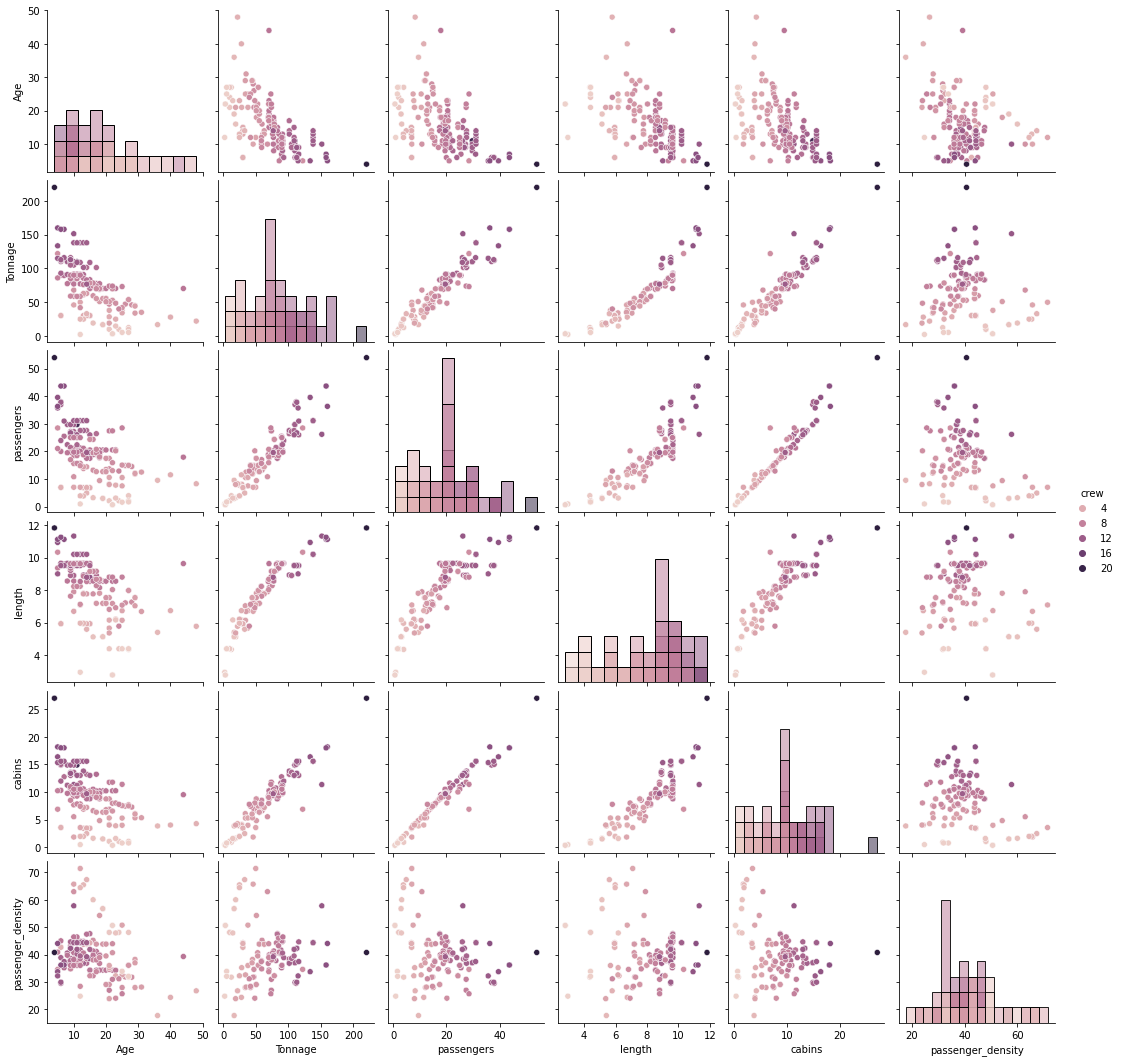

In [48]:
sns.pairplot(ship_df, hue = "crew", diag_kind = "hist")

#### Interpretation der Plots

Alle drei Plots zeigen, dass die Größe der Schiffe zur Zeit exponentiell mit jedem neuen Jahr wachsen und das die Größe, die Passagieranzahl, die Anzahl der Kbinen, die Tonnage und auch die Anzahl der Crew linear wächst und miteinander korreliert. Das Merkmal `passenger_density` scheint keinen Zussammenhang mit irgend einem anderen Merkmal aufzuzeigen.

## Lineare Regression

In [51]:
from sklearn.linear_model import LinearRegression

In [134]:
X_Tonnage = ship_df[["Tonnage"]]
X_passengers = ship_df[["passengers"]]
X_Age = ship_df[["Age"]]
X_length = ship_df[["length"]]
X_cabins = ship_df[["cabins"]]

y = ship_df[["crew"]]


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y)

In [136]:
reg_T = LinearRegression().fit(X_Tonnage, y)
reg_p = LinearRegression().fit(X_passengers, y)
reg_A = LinearRegression().fit(X_Age, y)
reg_l = LinearRegression().fit(X_length, y)
reg_c = LinearRegression().fit(X_cabins, y)

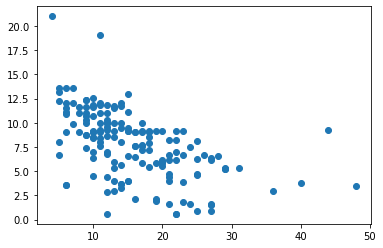

In [122]:
fig = plt.scatter(X.iloc[:,0],y)

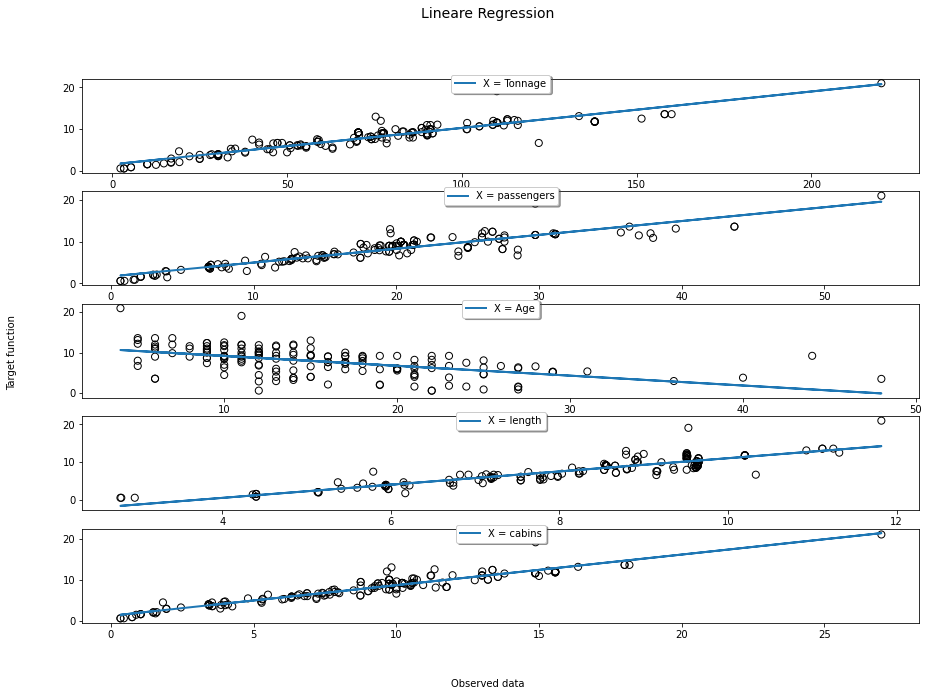

In [143]:
# Resultate plotten

lw = 2 # Dicke der Linien

Xs = [X_Tonnage, X_passengers, X_Age, X_length, X_cabins]
regs = [reg_T, reg_p, reg_A, reg_l, reg_c]
kernel_label = ["X = Tonnage", "X = passengers", "X = Age", "X = length", "X = cabins"]

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 10), sharey=False)
for ix, X in enumerate(Xs):
    axes[ix].plot(Xs[ix], regs[ix].predict(Xs[ix]), lw=lw,label=kernel_label[ix])
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)
    axes[ix].scatter(Xs[ix].iloc[:,0],y,
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')

fig.text(0.5, 0.04, 'Observed data', ha='center', va='center')
fig.text(0.06, 0.5, 'Target function', ha='center', va='center', rotation='vertical')
fig.suptitle("Lineare Regression", fontsize=14)
plt.show()